In [27]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [28]:
# Задаємо кількість слів, які ми хочемо використовувати
max_features = 10000
# Задаємо максимальну довжину рецензії
maxlen = 200

In [29]:
print('Завантажуємо дані...')
# Завантажуємо дані із датасету IMDb
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'тренувальних послідовностей')
print(len(input_test), 'тестових послідовностей')

print('Паддінг послідовностей (зразки до однакової довжини)')
# Паддінг послідовностей до максимальної довжини
input_train = np.array([np.pad(seq, (0, maxlen - len(seq)), mode='constant') if len(seq) < maxlen else seq[:maxlen] for seq in input_train])
input_test = np.array([np.pad(seq, (0, maxlen - len(seq)), mode='constant') if len(seq) < maxlen else seq[:maxlen] for seq in input_test])

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Завантажуємо дані...
25000 тренувальних послідовностей
25000 тестових послідовностей
Паддінг послідовностей (зразки до однакової довжини)
input_train shape: (25000, 200)
input_test shape: (25000, 200)


In [30]:
model = Sequential()
# Додаємо Embedding шар, щоб перетворити слова в вектори
model.add(Embedding(max_features, 32))
# Додаємо два LSTM шари з 32 одиницями пам'яті кожен
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
# Додаємо повнозв'язний шар для класифікації
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 38s 202ms/step - loss: 0.6774 - accuracy: 0.5624 - val_loss: 0.6474 - val_accuracy: 0.6344
Epoch 2/10
157/157 [==============================] - 31s 197ms/step - loss: 0.6558 - accuracy: 0.5924 - val_loss: 0.6917 - val_accuracy: 0.5080
Epoch 3/10
157/157 [==============================] - 31s 199ms/step - loss: 0.6663 - accuracy: 0.5737 - val_loss: 0.7485 - val_accuracy: 0.6150
Epoch 4/10
157/157 [==============================] - 31s 200ms/step - loss: 0.5920 - accuracy: 0.6920 - val_loss: 0.6206 - val_accuracy: 0.6344
Epoch 5/10
157/157 [==============================] - 32s 202ms/step - loss: 0.6044 - accuracy: 0.6491 - val_loss: 0.6127 - val_accuracy: 0.7364
Epoch 6/10
157/157 [==============================] - 32s 202ms/step - loss: 0.6493 - accuracy: 0.6083 - val_loss: 0.6667 - val_accuracy: 0.5512
Epoch 7/10
157/157 [==============================] - 32s 204ms/step - loss: 0.6602 - accuracy: 0.5545 - val_loss: 0.6552 - val_ac

In [31]:
# Оцінюємо точність та втрати моделі на тренувальних та тестових даних
train_loss, train_accuracy = model.evaluate(input_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(input_test, y_test, verbose=0)

print('Точність на тренувальних даних:', train_accuracy)
print('Втрати на тренувальних даних:', train_loss)
print('Точність на тестових даних:', test_accuracy)
print('Втрати на тестових даних:', test_loss)

Точність на тренувальних даних: 0.6246799826622009
Втрати на тренувальних даних: 0.6204097270965576
Точність на тестових даних: 0.6070399880409241
Втрати на тестових даних: 0.6413940191268921


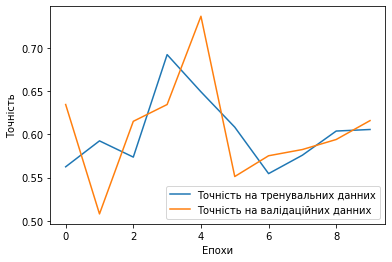

In [32]:
# Графік точності моделі на тренувальних та валідаційних даних
plt.plot(history.history['accuracy'], label='Точність на тренувальних данних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних данних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()